# IMPORTING REQUIRED LIBRARIES

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,r2_score
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

# LOADING DATASET

In [2]:
data_set=pd.read_csv('C:\\Users\\91638\\Videos\\task 3\\car data.csv')
data_set.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
data_set.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [4]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
data_set.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [6]:
print(data_set.Fuel_Type.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [7]:
print(data_set.Selling_type.value_counts())

Dealer        195
Individual    106
Name: Selling_type, dtype: int64


In [8]:
print(data_set.Transmission.value_counts())

Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [9]:
data_set.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
data_set.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)
data_set.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [10]:
data_set.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


# SPLITTING DATA

In [11]:
X=data_set.drop(['Car_Name','Selling_Price'],axis=1)
X

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [12]:
Y=data_set['Selling_Price']
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [13]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)
X_train

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
146,2014,0.787,15000,0,1,0,0
260,2016,13.600,29223,0,0,0,0
37,2003,2.280,127000,0,1,0,0
273,2010,7.500,61203,0,0,0,0
164,2016,0.540,14000,0,1,0,0
...,...,...,...,...,...,...,...
251,2013,9.900,56701,0,0,0,0
192,2007,0.750,49000,0,1,0,1
117,2015,1.900,14000,0,1,0,0
47,2006,4.150,65000,0,0,0,0


# LOADING LASSO MODEL

In [14]:
lass_model=Lasso()
lass_model.fit(X_train,Y_train)

Lasso()

# MODEL EVALUATION

In [15]:
y_pred = lass_model.predict(X_test).round()

In [16]:
print("Accuracy :",r2_score(Y_test,y_pred))

Accuracy : 0.8061894861956245


# VISUALIZE ACTUAL PRICE AND PRIDICTED PRICE

Text(0.5, 1.0, 'Actual price vs pridicted price')

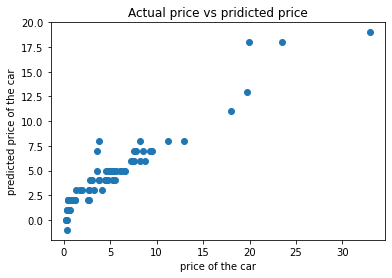

In [17]:
plt.scatter(Y_test,y_pred)
plt.xlabel("price of the car")
plt.ylabel("predicted price of the car")
plt.title("Actual price vs pridicted price")